In [1]:
import os
import random
from shutil import copyfile


In [2]:
# print("The number of images with facemask labelled 'Correct':",len(os.listdir('data/correct')))
# print("The number of images with facemask labelled 'Nose not correct':",len(os.listdir('data/nose_NC')))
# print("The number of images with facemask labelled 'Nose Mouth not correct':",len(os.listdir('data/nose_mouth_NC')))
# print("The number of images with facemask labelled 'Chin Not Correct':",len(os.listdir('data/chin_NC')))

In [3]:
# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
#     dataset = []
#     source_list = os.listdir(SOURCE)
#     random.shuffle(source_list)
#     i = 0
#     for unitData in source_list:
#         data = SOURCE + unitData
#         if i < 3088:
#             i += 1
#             if(os.path.getsize(data) > 0):
#                 dataset.append(unitData)
#             else:
#                 print('Skipped ' + unitData)
#                 print('Invalid file i.e zero size')
    
#     train_set_length = int(len(dataset) * SPLIT_SIZE)
#     test_set_length = int(len(dataset) - train_set_length)
#     shuffled_set = random.sample(dataset, len(dataset))
#     train_set = dataset[0:train_set_length]
#     test_set = dataset[-test_set_length:]
       
#     for unitData in train_set:
#         temp_train_set = SOURCE + unitData
#         final_train_set = TRAINING + unitData
#         copyfile(temp_train_set, final_train_set)
    
#     for unitData in test_set:
#         temp_test_set = SOURCE + unitData
#         final_test_set = TESTING + unitData
#         copyfile(temp_test_set, final_test_set)

In [5]:
print("The number of images with facemask in the training set labelled 'Correct':", len(os.listdir('data/training/class_00/')))
print("The number of images with facemask in the test set labelled 'Correct':", len(os.listdir('data/testing/class_00/')))

print("The number of images without facemask in the training set labelled 'Nose not correct':", len(os.listdir('data/training/class_01/')))
print("The number of images without facemask in the test set labelled 'Nose not correct':", len(os.listdir('data/testing/class_01/')))

print("The number of images with facemask in the training set labelled 'Nose mouth not correct':", len(os.listdir('data/training/class_02/')))
print("The number of images with facemask in the test set labelled 'Nose mouth not correct':", len(os.listdir('data/testing/class_02/')))

print("The number of images with facemask in the training set labelled 'Chin not correct':", len(os.listdir('data/training/class_03/')))
print("The number of images with facemask in the test set labelled 'Chin not correct':", len(os.listdir('data/testing/class_03/')))

The number of images with facemask in the training set labelled 'Correct': 2470
The number of images with facemask in the test set labelled 'Correct': 618
The number of images without facemask in the training set labelled 'Nose not correct': 2470
The number of images without facemask in the test set labelled 'Nose not correct': 618
The number of images with facemask in the training set labelled 'Nose mouth not correct': 2470
The number of images with facemask in the test set labelled 'Nose mouth not correct': 618
The number of images with facemask in the training set labelled 'Chin not correct': 2470
The number of images with facemask in the test set labelled 'Chin not correct': 618


In [6]:
from PIL import Image

In [7]:
import tensorflow as tf

In [8]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

In [9]:
# gpus

In [10]:
# tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [11]:
# tf.debugging.set_log_device_placement(True)

In [12]:
# tf.config.list_physical_devices()

In [13]:
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [14]:
# tf.test.gpu_device_name()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [16]:
TRAINING_DIR = "data/training"
train_datagen = ImageDataGenerator(rescale=1.0/255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         batch_size=15, 
                                                    target_size=(150, 150))

Found 9880 images belonging to 4 classes.


In [84]:

VALIDATION_DIR = "data/testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=15, 
                                                         target_size=(150, 150))

Found 2472 images belonging to 4 classes.


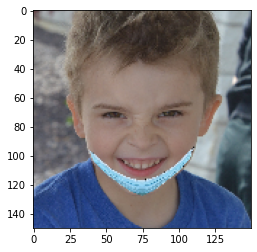

In [86]:
x,y = validation_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [88]:
from tensorflow.keras.applications.vgg16 import VGG16

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD

In [22]:
from keras import backend as K


In [23]:


# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(150,150,3)))
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2,2))


# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))




In [ ]:

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(150,150,3)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))




In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 152, 152, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 77, 77, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 256)       2

In [89]:
base = VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))
head = tf.keras.layers.Flatten()(base.output)
head = tf.keras.layers.Dense(100,activation='relu')(head)
head = tf.keras.layers.Dense(4,activation='softmax')(head)

model_vgg16 = tf.keras.Model(inputs=base.input,outputs=head)

58892288/58889256 [==============================] - 8s 0us/step


In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 152, 152, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 77, 77, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 256)       2

In [27]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')])


In [28]:
# model.summary()

In [29]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     0.1,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


In [30]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

In [31]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.hd5f',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

In [32]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=1, mode='auto',baseline=0.2)

In [33]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks=[checkpoint, earlyStopping])

Epoch 1/30
659/659 [==============================] - ETA: 0s - loss: 1.3852 - acc: 0.2659
Epoch 00001: val_loss improved from inf to 1.37143, saving model to model-001.hd5f
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.hd5f\assets
659/659 [==============================] - 1515s 2s/step - loss: 1.3852 - acc: 0.2659 - val_loss: 1.3714 - val_acc: 0.6214
Epoch 2/30
659/659 [==============================] - ETA: 0s - loss: 1.3103 - acc: 0.3714
Epoch 00002: val_loss improved from 1.37143 to 0.92478, saving model to model-002.hd5f
INFO:tensorflow:Assets written to: model-002.hd5f\assets
659/659 [==============================] - 1479s 2s/step - loss: 1.3103 - acc: 0.3714 - val_loss: 0.9248 - val_acc: 0.6966
Epoch 3/30
659/659 [==============================] - ETA: 0s - loss: 1.0538 - acc: 0.5060
Epoch 00003: val_loss improved from 0.92478 to 0.75393, saving model to model-003.hd5f
INFO:tensorflow:Assets writte

In [23]:
# loaded_model = tf.keras.models.load_model('model-041.hd5f')

In [37]:
history.history


{'loss': [1.3852156400680542,
  1.3103423118591309,
  1.05376136302948,
  0.8298369646072388,
  0.7381609678268433,
  0.626360297203064],
 'acc': [0.2658906877040863,
  0.3713562786579132,
  0.5059716701507568,
  0.6387651562690735,
  0.6857287287712097,
  0.7350202202796936],
 'val_loss': [1.3714325428009033,
  0.9247815012931824,
  0.7539276480674744,
  0.6147941946983337,
  0.5608171224594116,
  0.5023452043533325],
 'val_acc': [0.6213592290878296,
  0.696601927280426,
  0.7350323796272278,
  0.723705530166626,
  0.7665857672691345,
  0.8143203854560852]}

In [39]:
import matplotlib.pyplot as plt

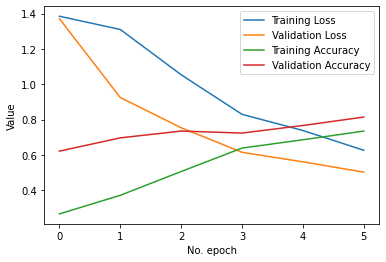

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [1]:
import cv2
import numpy as np

In [2]:
labels_dict={0:'Correct',1:'Nose not correct',2:'Nose Mouth not correct',3:'Chin Not correct'}
color_dict={0:(0,255,0),1:(0,0,255),2:(0,0,255),3:(0,0,255)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img_counter = 0
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror
    
    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        
        resized=cv2.resize(face_img,(200,200))
        cv2.imshow('LIVE',   resized)
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=0#model.predict(reshaped)
        print(result)
#         max_result = np.argmax(result,axis=1)
        label=0#max_result[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
#     cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
#     elif key == 32:
#         # SPACE pressed
#         img_name = "opencv_frame_{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
#         img_counter += 1
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'